<a href="https://colab.research.google.com/github/yeswhos/Code-Practice/blob/master/Foxcoon_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
datas = [1.08, 1.075, 0.99, 0.96, 1.03, 0.95, 0.99, 1.104, 1.112, 1.078, 
         0.977, 0.989, 1.15, 0.96, 0.927, 1.057, 1.069, 0.978, 0.964, 1.17,
         1.057, 0.987, 1.118, 0.96, 1.103, 1.11, 0.95, 0.99, 0.963, 0.979]

In [3]:
# 平均值
x_mean = np.mean(datas)
x_avg = sum(datas) / len(datas)
# 方差
x_var = np.var(datas)
# 标准差
x_std = np.std(datas)

In [4]:
UCL = x_mean + 3*x_std
LCL = x_mean - 3*x_std
USL = 1.3
LSL = 0.7

In [5]:
def calculate_peak(x):
  USL = 1.3
  LSL = 0.7
  x_mean = np.mean(x)
  x_std = np.std(x)
  cpu = (USL - x_mean) / (3 * x_std)
  cpl = (x_mean - LSL) / (3 * x_std)
  cpk = min(cpu, cpl)
  return cpk

In [6]:
def cpkEvaluate(cpk_num):
  return '特级' if cpk_num >= 2 else '一级' if (cpk_num >= 1.67 and cpk_num <= 2) else '二级' if (cpk_num >= 1.33 and cpk_num < 1.67) else '待补充'

In [7]:
def above_line(num):
  return False if (num > USL and num < LSL) else True

In [8]:
def judge_same_side(*args):
  if len(args) >= 9:
    func = lambda i : True if i < 1 else False
    queue = [func(x) for x in args[-9:]]
    return len(set(queue)) == 1
  else:
    raise Exception('Less than nine')

In [9]:
def trend(*args):
  if len(args) >= 6:
    climb_trend = sorted(args[-6:][:], reverse=True)
    decend_trend = sorted(args[-6:][:], reverse=True)
    return list(args[-6:]) == climb_trend or list(args[-6:]) == decend_trend
  else:
    raise Exception('Less than six')

In [10]:
def cross_appear(*args):
  if len(args) >= 14:
    flag = False if args[0] < args[1] else True
    a = args[::2]
    b = args[1::2]
    for i in range(7):
      if a[i] > b[i] and flag == False:
        return False
      elif a[i] < b[i] and flag == True:
        return False
    return True
  else:
    raise Exception('Less than forteen')

In [11]:
ran_data = random.uniform(USL, LSL)

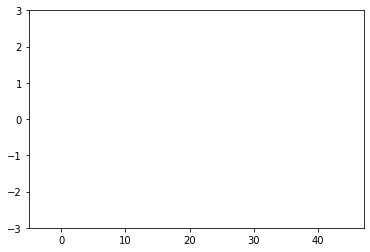

In [12]:
fig, ax = plt.subplots()          #生成轴和fig,  可迭代的对象
x, y= [], []    #用于接受后更新的数据
line, = plt.plot([], [], '.-')   #绘制线对象，plot返回值类型，要加逗号

#------说明--------#
#核心函数包含两个：
#一个是用于初始化画布的函数init()
#另一个是用于更新数据做动态显示的update()


def init():
	#初始化函数用于绘制一块干净的画布，为后续绘图做准备
    ax.set_xlim(-5, 15*np.pi)    #初始函数，设置绘图范围
    ax.set_ylim(-3, 3)
    return line

def update(step):           #通过帧数来不断更新新的数值
    x.append(step)
    y.append(np.cos(step/3)+np.sin(step**2))    #计算y
    line.set_data(x, y)
    return line

#fig 是绘图的画布
#update 为更新绘图的函数，step数值是从frames 传入
#frames 数值是用于动画每一帧的数据
ani = FuncAnimation(fig, update, frames=datas,
                    init_func=init,interval=20)

plt.show()


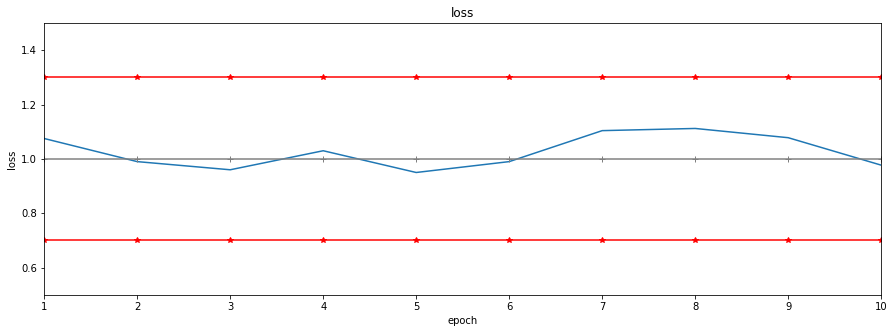

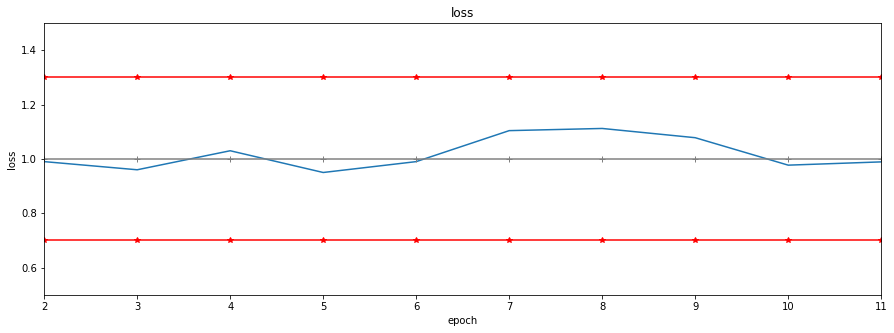

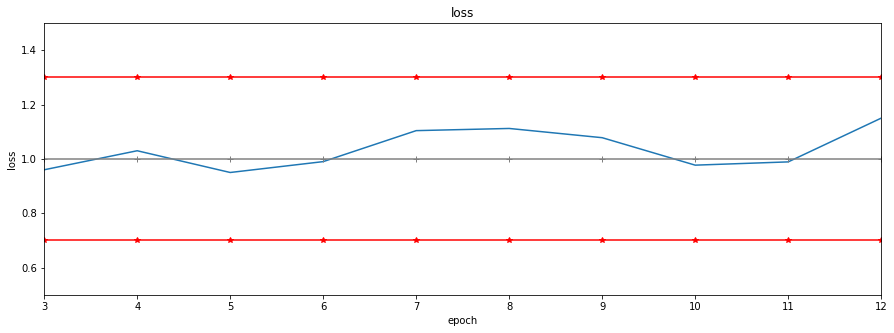

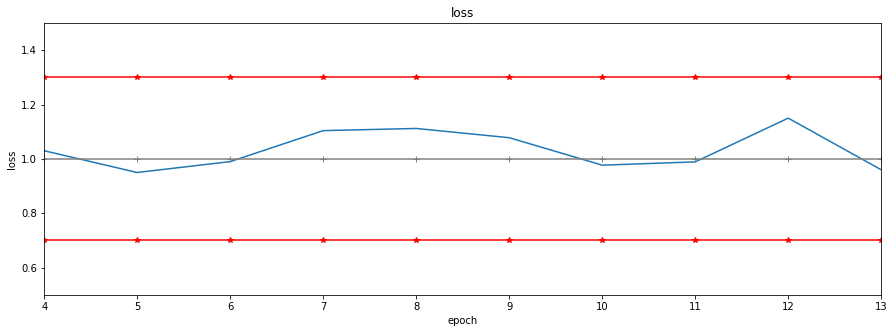

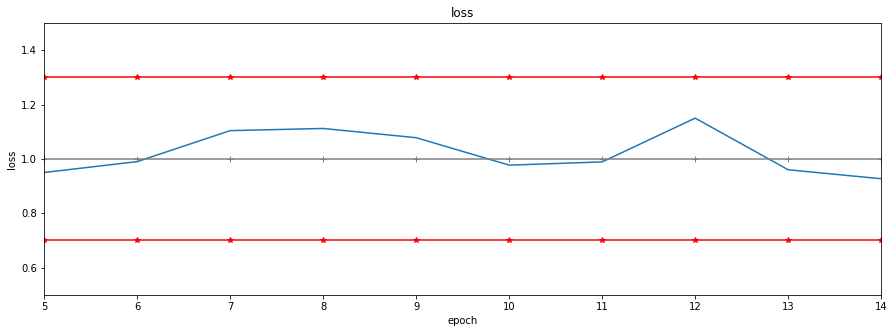

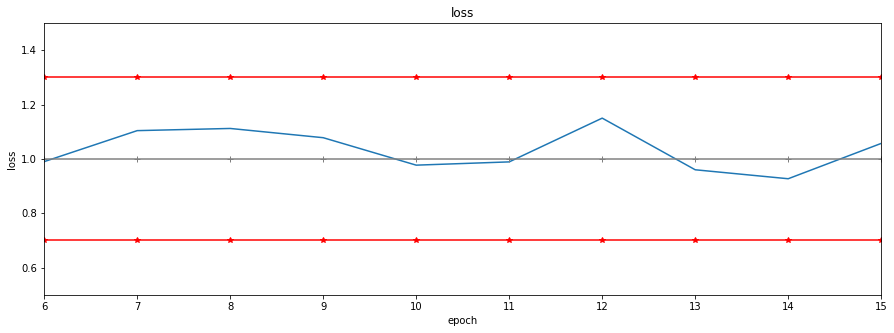

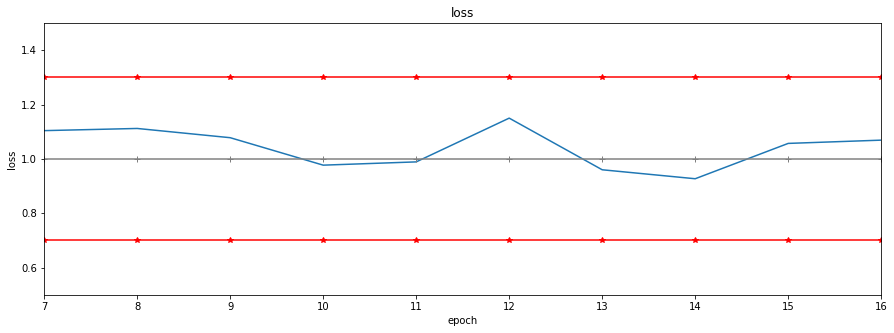

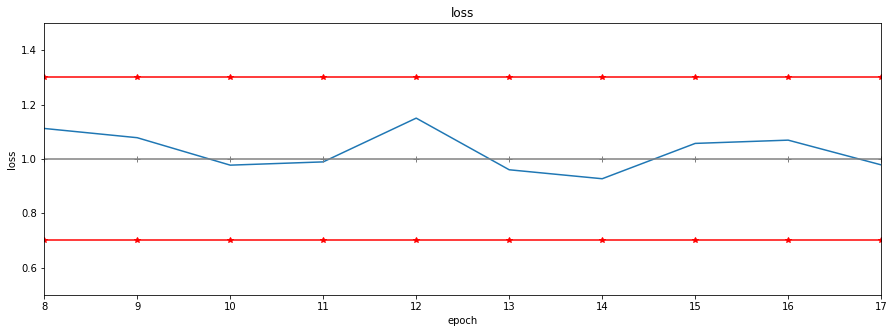

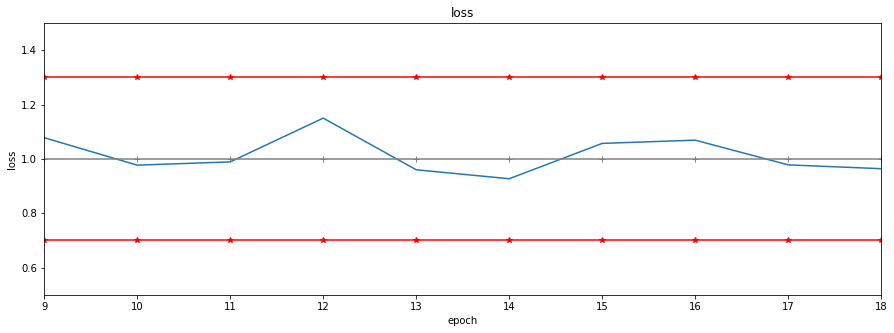

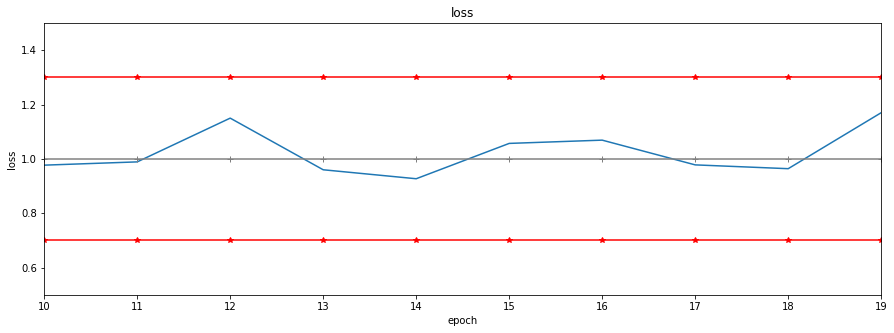

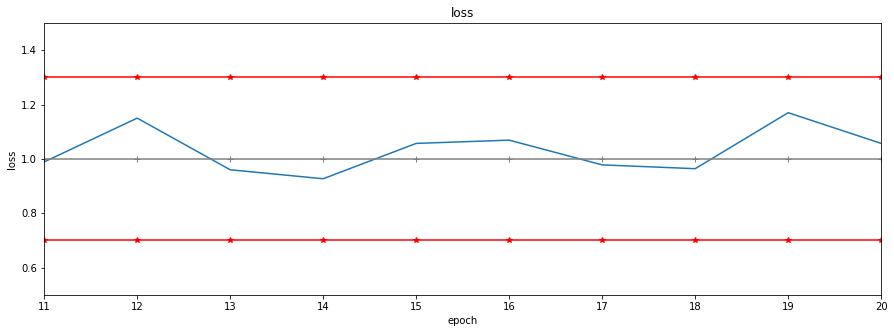

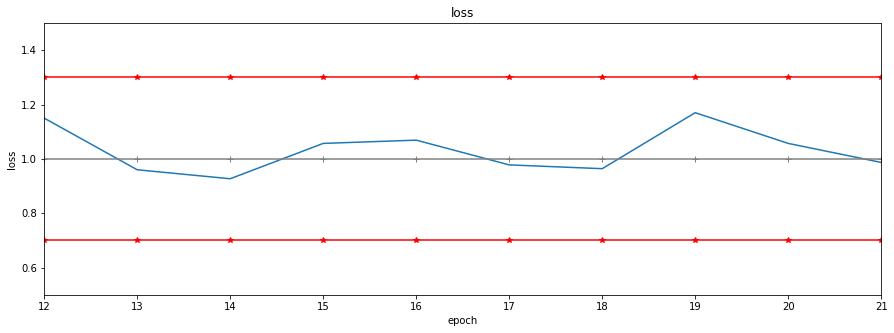

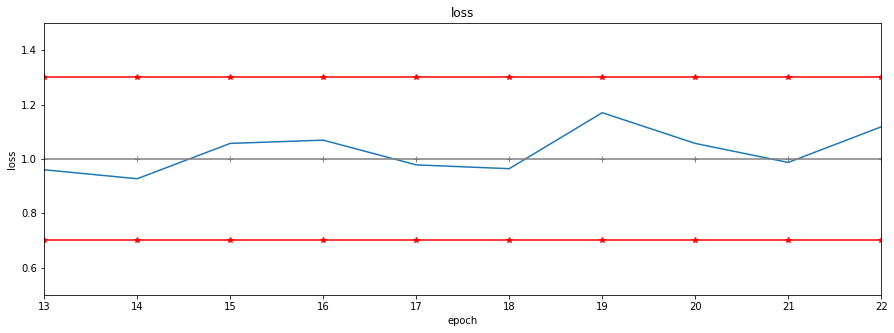

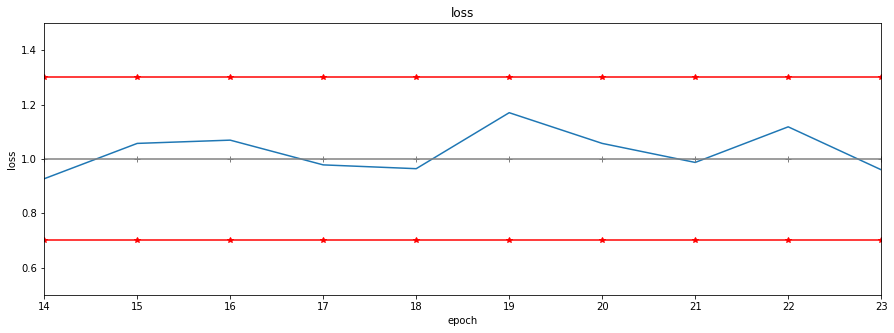

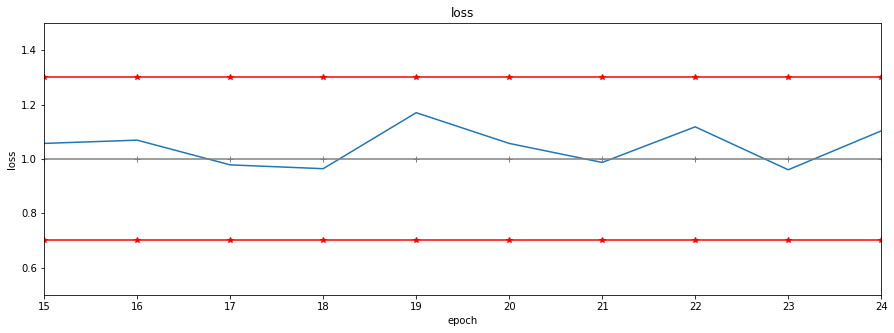

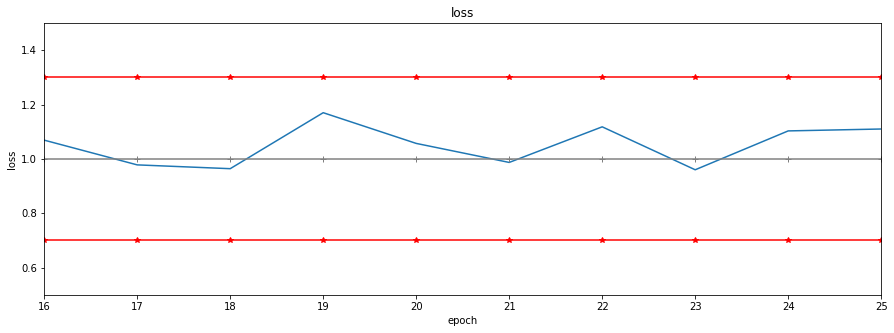

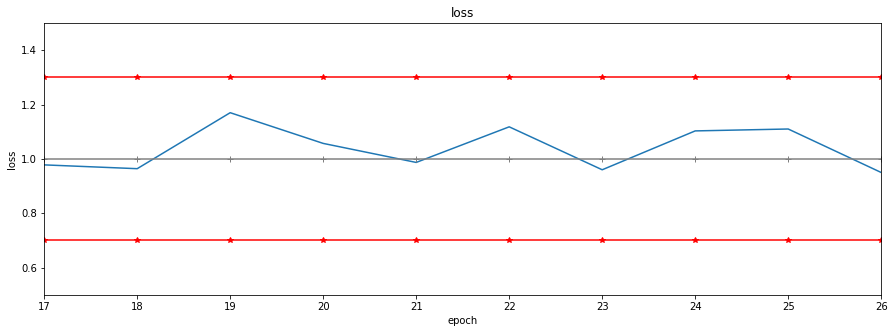

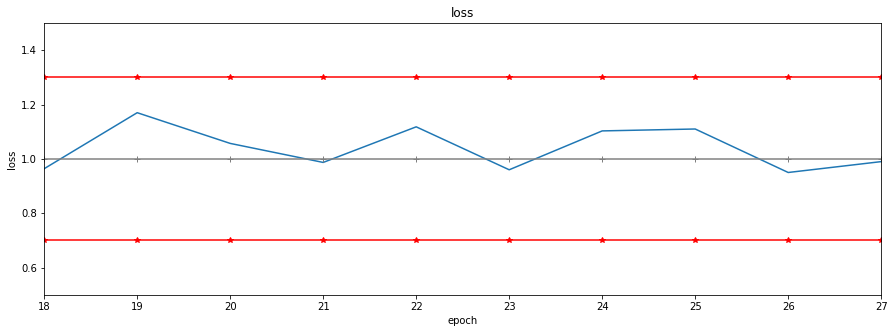

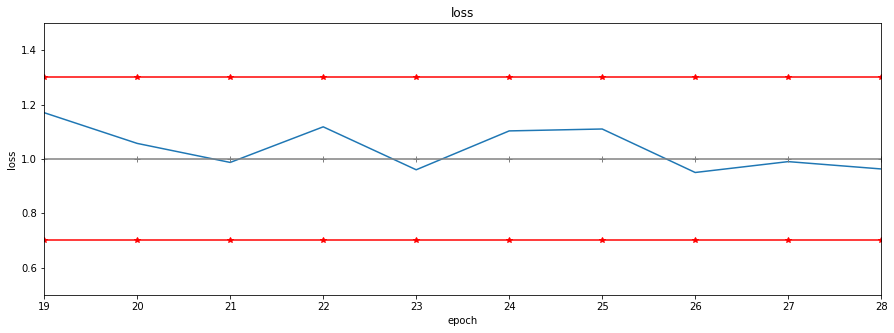

In [43]:
# 画图-清理-画图，的一个循环的过程
import matplotlib.pyplot as plt
x = list(range(0, len(datas)))  # epoch array
# loss = [2 / (i**2) for i in x]  # loss values array
# 打开交互模式
# plt.figure(figsize=(5, 10))
plt.ion()
for i in range(1, len(x)):
  LSL_lines = [1.3] * 10
  USL_lines = [0.7] * 10
  central_lines = [1] * 10
  if i > 10:
    plt.figure(figsize=(15,5))
    ix = x[i-10:i]
    iy = datas[i-10:i]
    
    # 清除axes对象
    plt.cla()
    plt.xlim((i-10, i-1))
    plt.ylim((0.5, 1.5))
    plt.title("loss")
    plt.plot(ix, iy)
    plt.plot(ix, USL_lines, '*-', color='r')
    plt.plot(ix, LSL_lines, '*-', color='r')
    plt.plot(ix, central_lines, '+-', color='grey')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.pause(0.5)
# 关闭交互模式
plt.ioff()
plt.show()

AttributeError: ignored

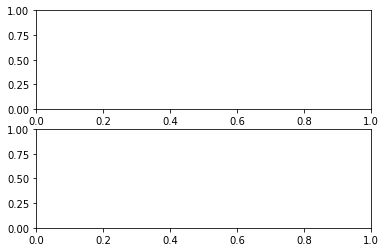